# K-means Clustering

Haz tu propio algoritmo de clusterización de datos de tipo K-means (o mediante K-means).
No te preocupes si no sabes cómo es el algoritmo, te lo vamos qué pasos debes dar con pseudo-código.

## Los datos de entrada para clusterizar

Haremos uso de la librería [Scikit-learn](https://scikit-learn.org/stable/) -de la cual hablaremos más extensamente la semana que viene- para generar un conjunto de datos que clusterizar:

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

dataset, membership = datasets.make_blobs(n_samples=500, n_features=2,
                                          centers=3, cluster_std=1.0)

La variable `dataset` contiene un numpy.array con 500 puntos en un espacio bidimensional:

In [6]:
dataset.shape

(500, 2)

La variable `membership` nos da la solución al problema que pretendemos resolver... nos dice a qué cluster pertenece cada punto según contenga un 0, 1 o 2:

In [7]:
membership

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2,
       2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 1,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0,
       1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2,
       0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1,

Usemos `dataset` y `membership` para representar gráficamente los puntos que usaremos como "datos a clusterizar". Vamos a colorear cada punto de un color según a que cluster pertenecen:

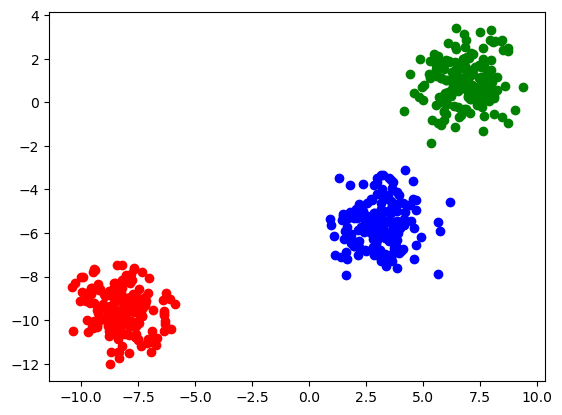

In [8]:
plt.scatter(dataset[(membership==0),0], dataset[(membership==0),1], color='r')
plt.scatter(dataset[(membership==1),0], dataset[(membership==1),1], color='g')
plt.scatter(dataset[(membership==2),0], dataset[(membership==2),1], color='b')
plt.show()

## Haz tu propio algoritmo K-means

Supon que tienes almacenados en una variable llamada `dataset` un numpy.array con las coordenadas $x$ e $y$ de 500 puntos:

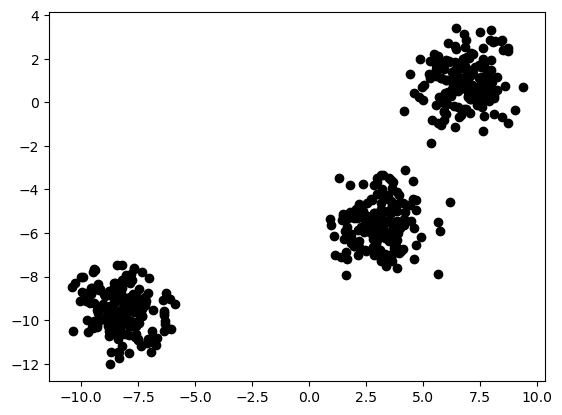

In [9]:
plt.scatter(dataset[:,0], dataset[:,1], color='k')
plt.show()

Y quieres clusterizar los datos en 3 conjuntos de puntos con un algoritmo de K-means, pero no tienes acceso a ninguna librería de Python que tenga una función para hacerlo... Así que... tendrás que implementar tu propia función de K-means clustering.

A continuación tienes la descripción del algoritmo en pseudo código. Implementa tu propio algoritmo y representa gráficamente la distribución de puntos de `dataset` en el espacio bidimensional con un color distinto según al cluster que pertenecen resultado de tu algoritmo. ¿Puedes reproducir la primera gráfica de este notebook?

### Pseudo-código del algoritmo de K-means

>1. Elije el número de k centroides (en nuestro caso k=3)
>2. Inicializa de forma aleatoria las coordinadas de los k centroides en el espacio de coordenadas de tus datos. Estos k centroides pueden ser puntos nuevos con coordenadas aleatorias, o pueden ser k puntos de tu dataset elegidos al azar.
>3. Itera:
>4.       Asigna cada punto de tu dataset al centroid más cercano.
>5.       Calcular las nuevas coordenadas de los k centroides como el centro geométrico del conjunto de puntos que le fueron asignados en 4.
>6.       Calcula la distancia euclidea que se desplazó cada centroide.
>7.       Sal de la iteración si las coordenadas de los centroides no cambiaron (si todos los desplazamientos calculados en 6 son prácticamente nulos).
>8. Identifica los k cluster resultantes como los k conjuntos de puntos de tu data set asignados a cada centroide.


In [10]:
# Elegimos inicialmente como centroides 3 puntos cualesquiera del dataset
n_points=500
k=3
k_coordinates=[dataset[ii] for ii in np.random.choice(n_points, 3, replace=False)]

In [11]:
# Iteramos los pasos 4,5,6,7

from scipy.spatial.distance import euclidean

new_membership = np.zeros(n_points, dtype=np.int64)

iteration=0
while True:

    ## Paso 4
    for ii in range(n_points):
        distances_to_kmeans = [euclidean(dataset[ii], k_coordinates[jj]) for jj in range(3)]
        new_membership[ii]=np.argmin(distances_to_kmeans)

    ## Paso 5
    k_new_coordinates=[]
    for ii in range(k):
        aux_coordinates = dataset[new_membership==ii].mean(axis=0)
        k_new_coordinates.append(aux_coordinates)

    ## Paso 6
    k_shifts=[]
    for ii in range(k):
        shift = euclidean(k_coordinates[ii], k_new_coordinates[ii])
        k_shifts.append(shift)

    ## Paso 7
    max_shift = np.max(k_shifts)
    if max_shift<0.000001:
        break
    else:
        print(f'Iteration {iteration} with max shift: {max_shift}')
        k_coordinates=k_new_coordinates

    iteration+=1

Iteration 0 with max shift: 1.9153167573252725
Iteration 1 with max shift: 0.026290444118013467


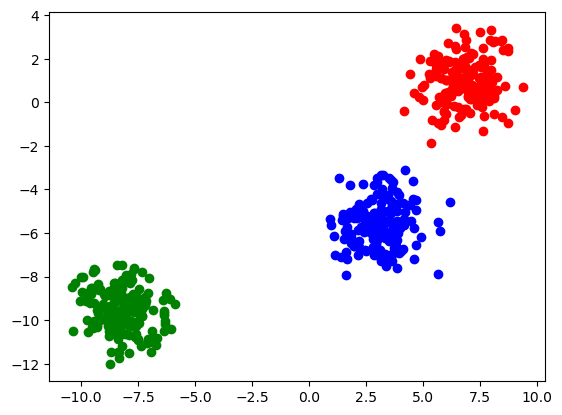

In [12]:
# veamos los nuevos clusters obtenidos:

plt.scatter(dataset[(new_membership==0),0], dataset[(new_membership==0),1], color='r')
plt.scatter(dataset[(new_membership==1),0], dataset[(new_membership==1),1], color='g')
plt.scatter(dataset[(new_membership==2),0], dataset[(new_membership==2),1], color='b')
plt.show()